In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
holidays=pd.read_csv('data/holidays_events.csv')
oil=pd.read_csv('data/oil.csv')
stores=pd.read_csv('data/stores.csv')
train_data=pd.read_csv('data/train.csv')
transaction=pd.read_csv('data/transactions.csv')


In [3]:
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [4]:
df1=train_data
df1 = df1.set_index('date')
df1.index = pd.to_datetime(df1.index)

In [44]:
df1.head()

id  store_nbr      family  sales  onpromotion
date                                                     
2013-01-01   0          1  AUTOMOTIVE    0.0            0
2013-01-01   1          1   BABY CARE    0.0            0
2013-01-01   2          1      BEAUTY    0.0            0
2013-01-01   3          1   BEVERAGES    0.0            0
2013-01-01   4          1       BOOKS    0.0            0

In [49]:
total_sales=df1.groupby('date').sum()

C:\Users\ACER\AppData\Local\Temp\ipykernel_3208\309055727.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_sales=df1.groupby('date').sum()


In [50]:
total_sales

id  store_nbr          sales  onpromotion
date                                                         
2013-01-01     1586871      49005    2511.618999            0
2013-01-02     4762395      49005  496092.417944            0
2013-01-03     7937919      49005  361461.231124            0
2013-01-04    11113443      49005  354459.677093            0
2013-01-05    14288967      49005  477350.121229            0
...                ...        ...            ...          ...
2017-08-11  5333291667      49005  826373.722022        14179
2017-08-12  5336467191      49005  792630.535079         8312
2017-08-13  5339642715      49005  865639.677471         9283
2017-08-14  5342818239      49005  760922.406081         8043
2017-08-15  5345993763      49005  762661.935939        10605

[1684 rows x 4 columns]

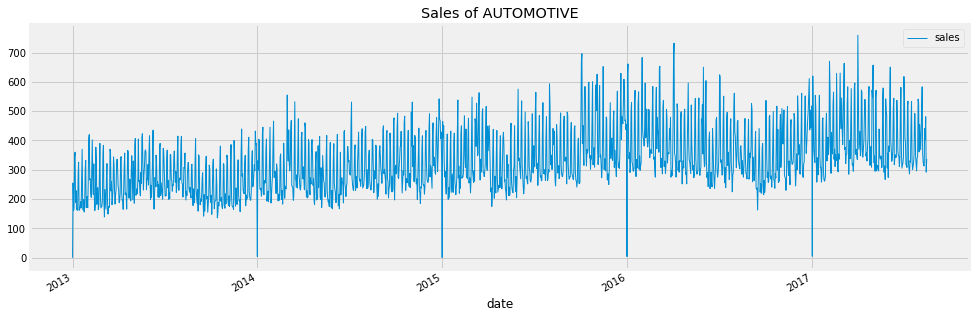

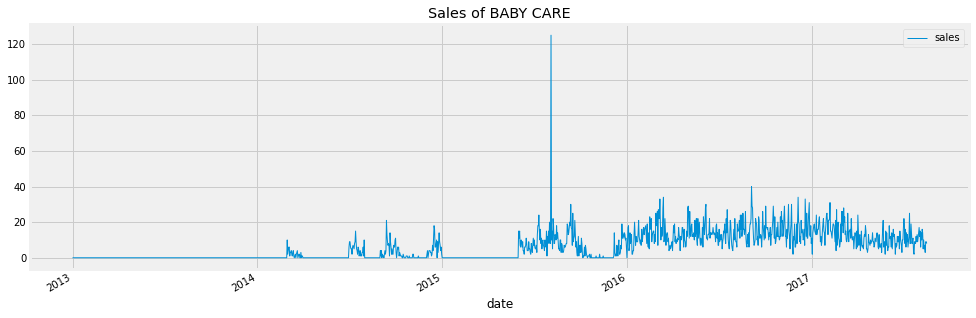

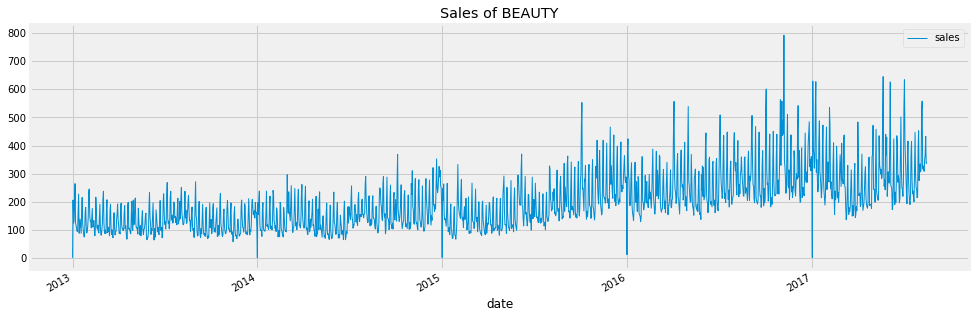

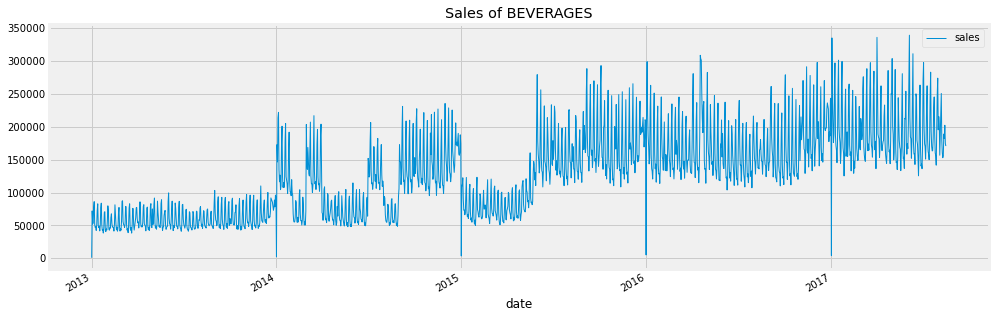

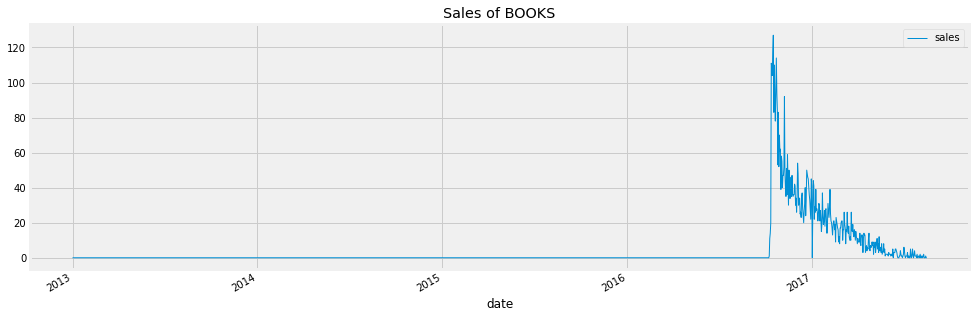

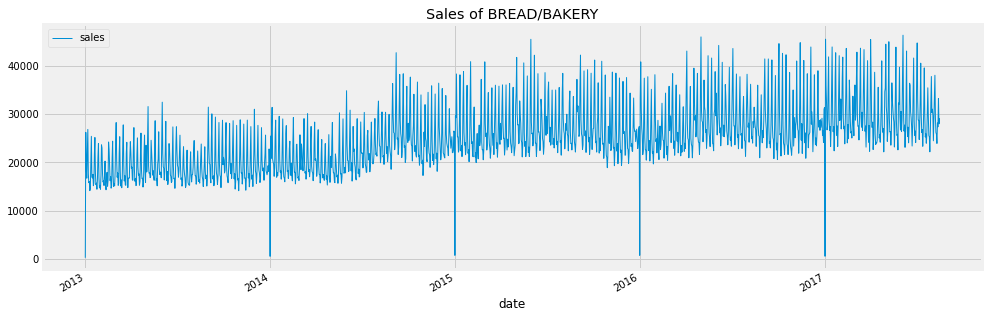

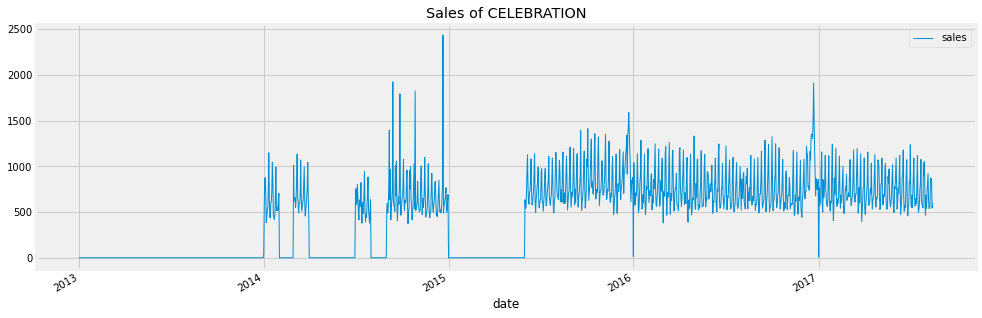

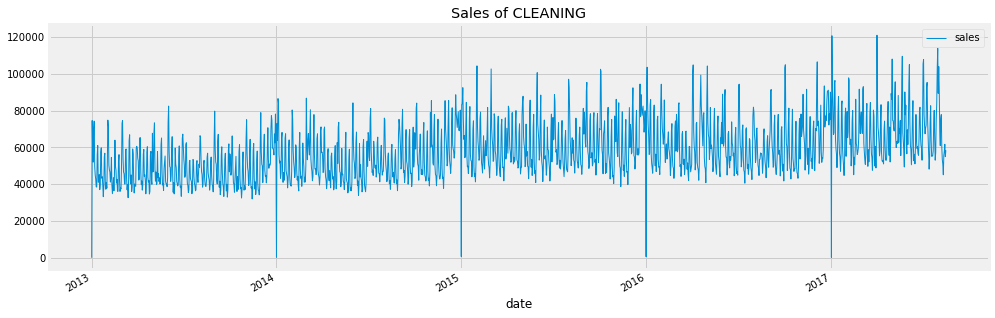

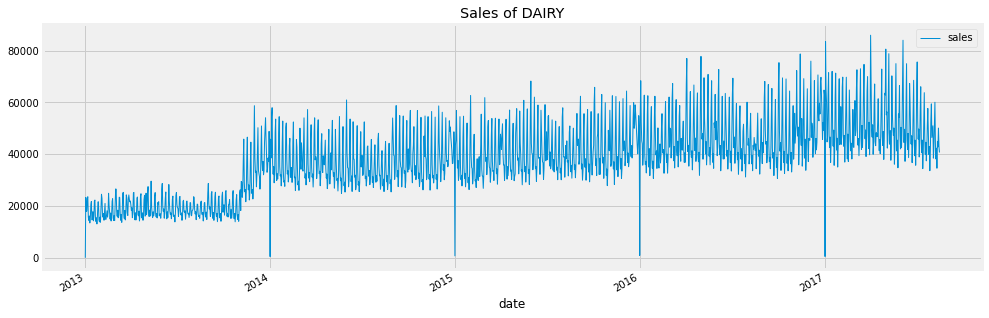

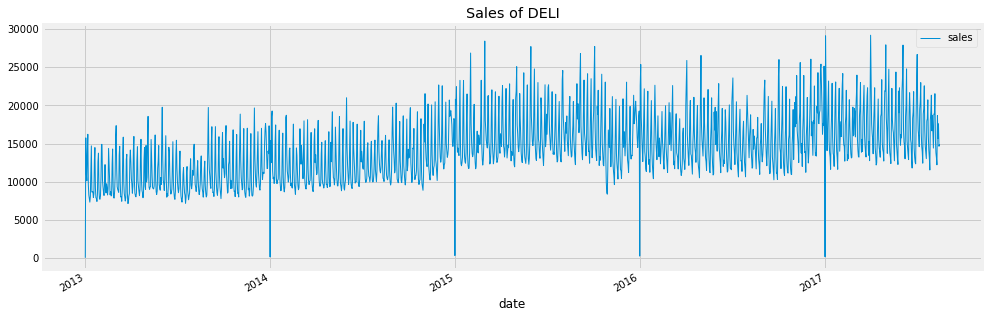

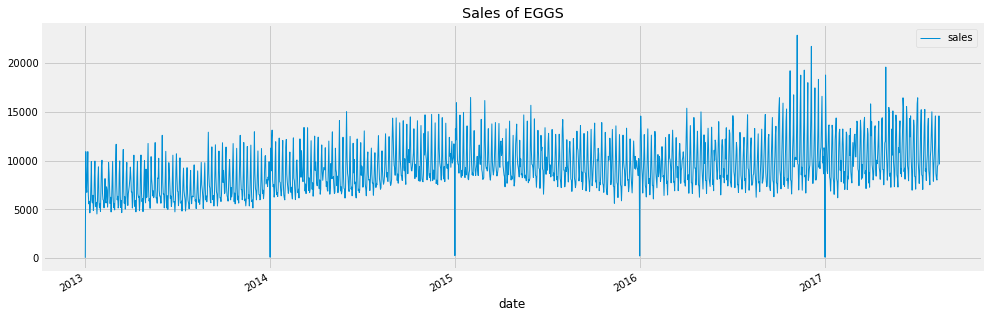

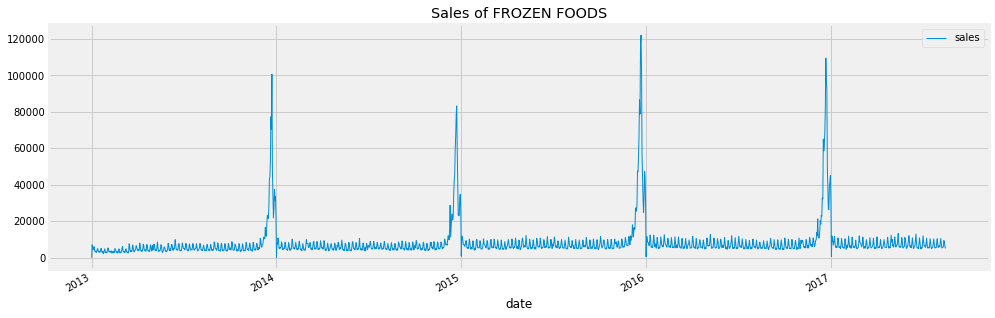

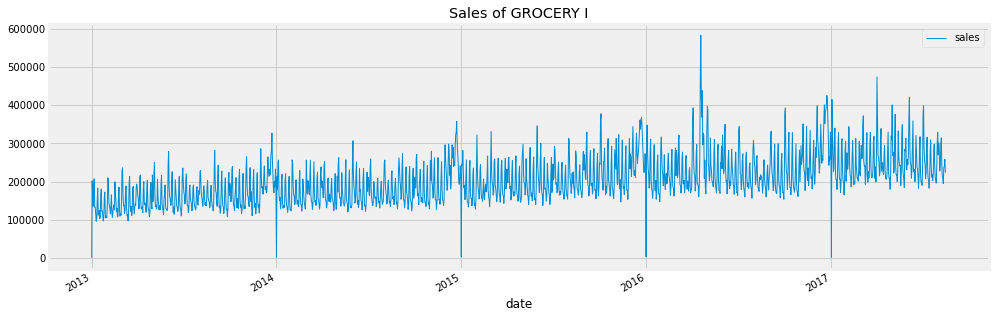

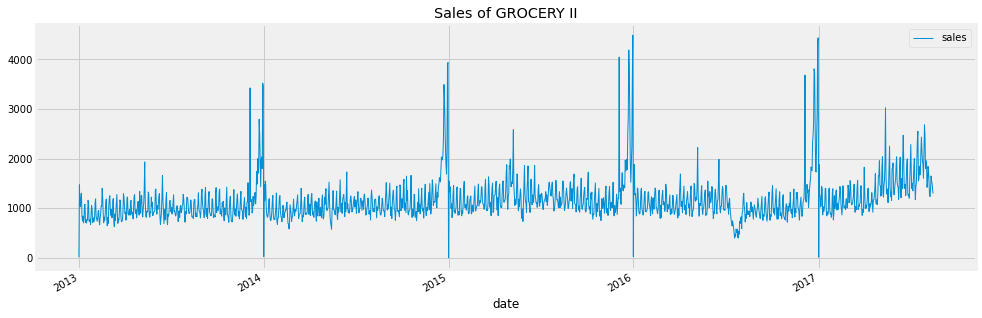

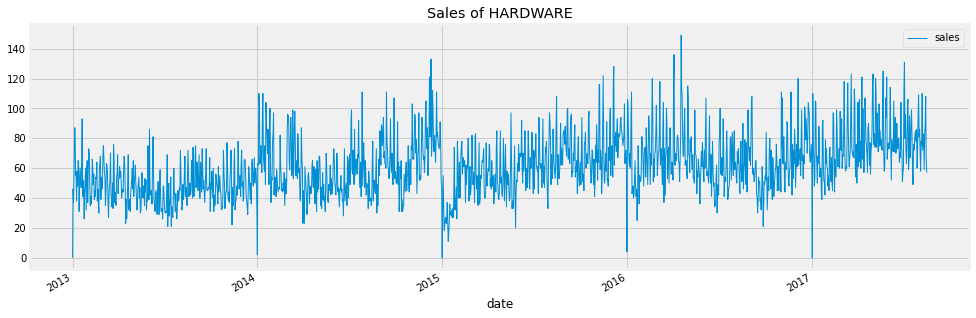

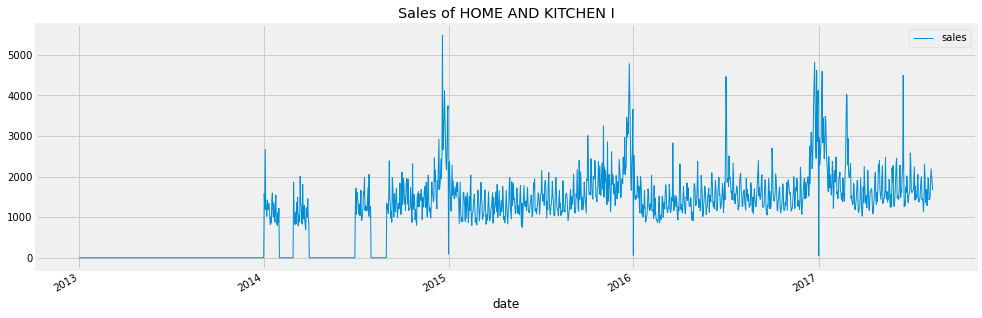

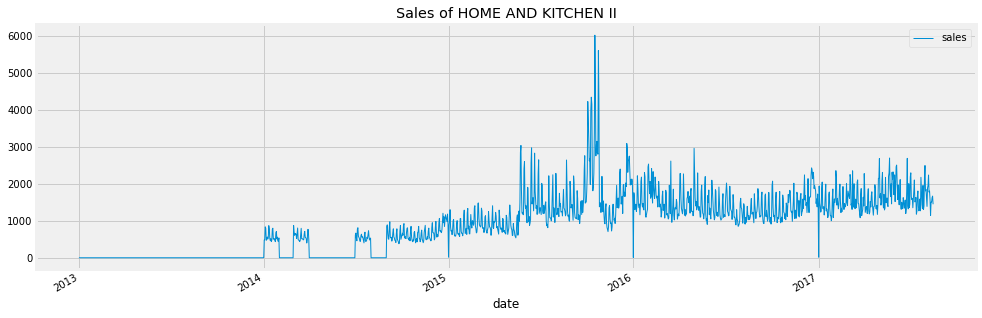

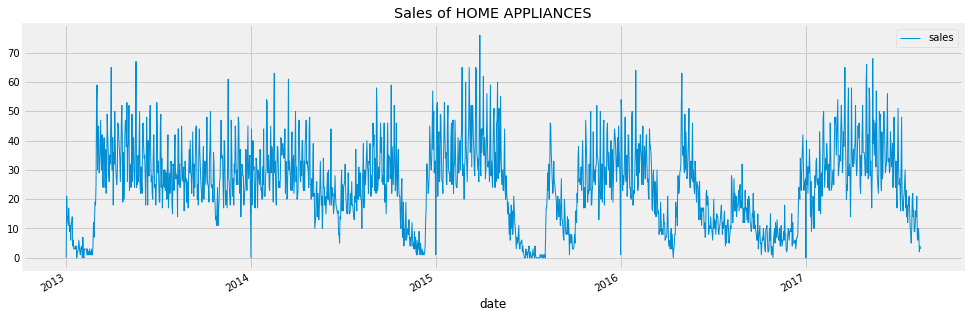

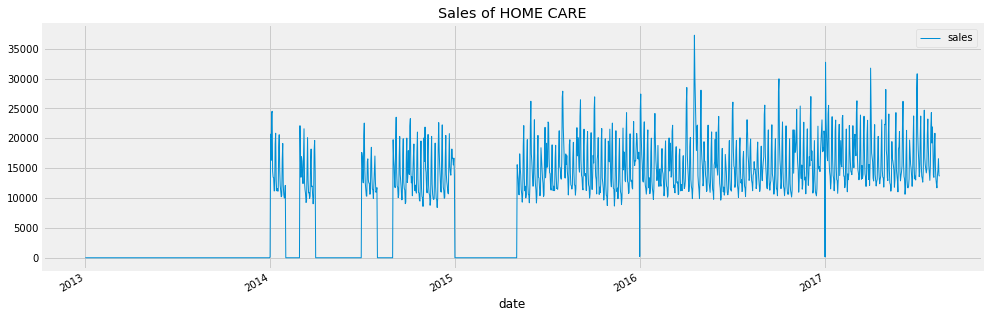

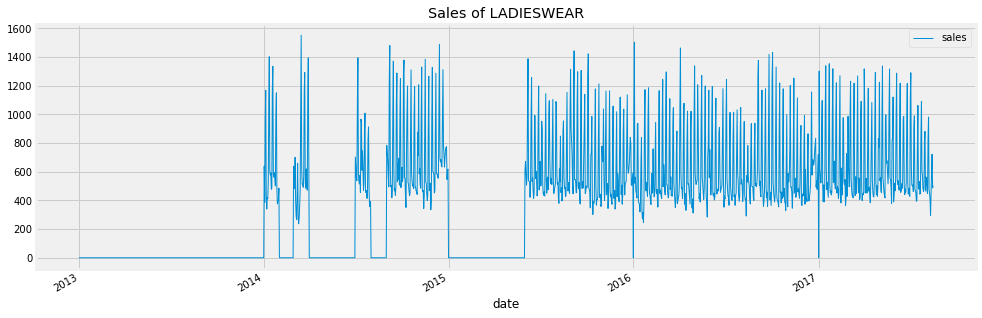

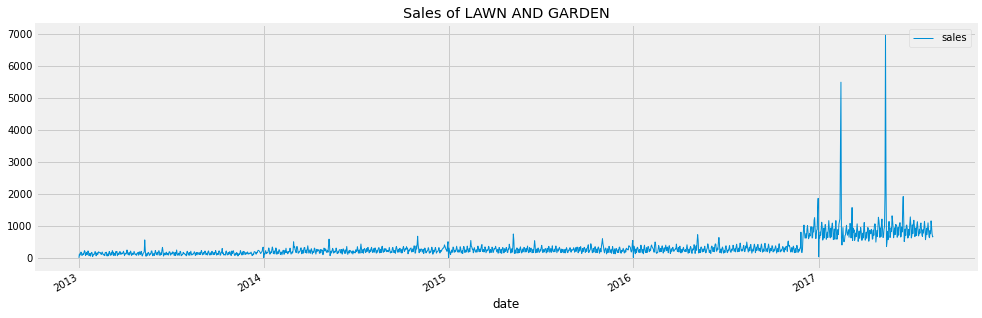

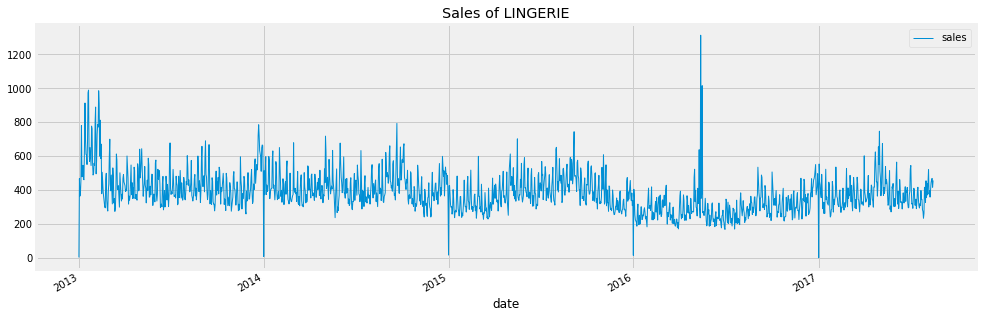

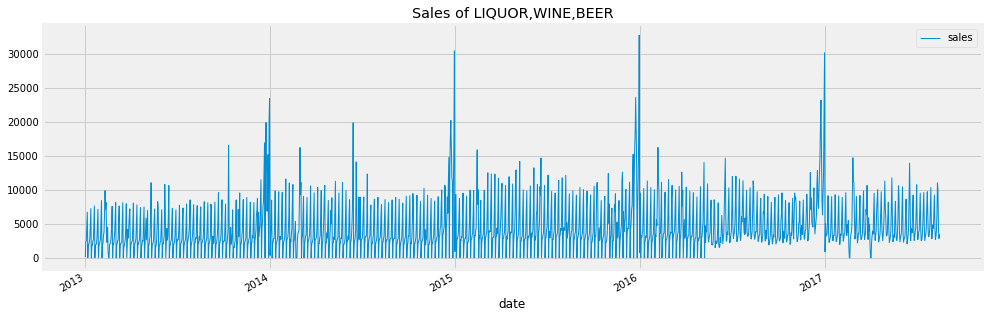

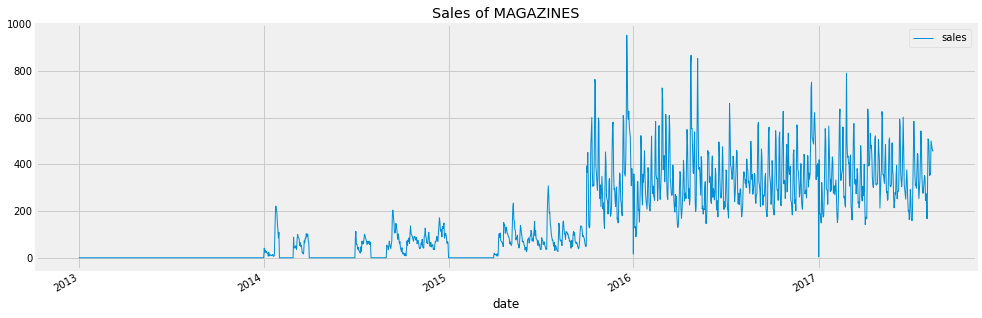

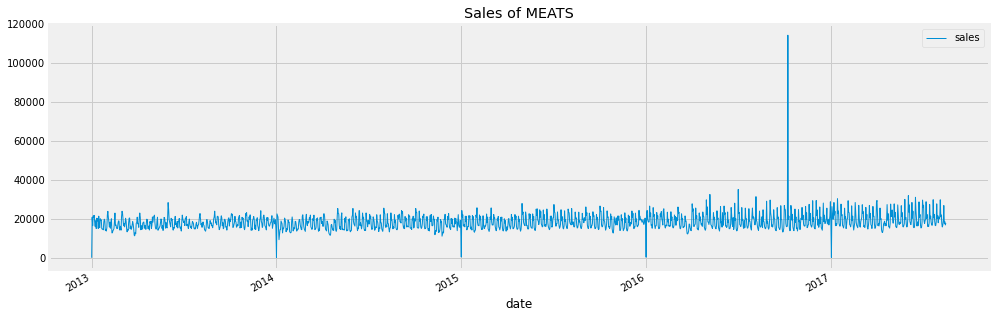

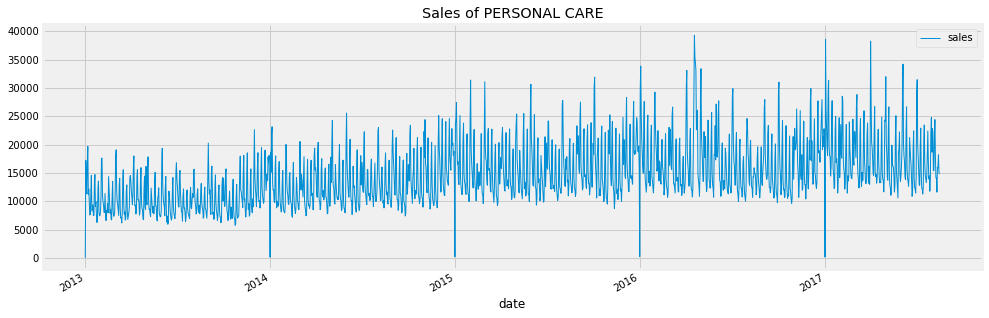

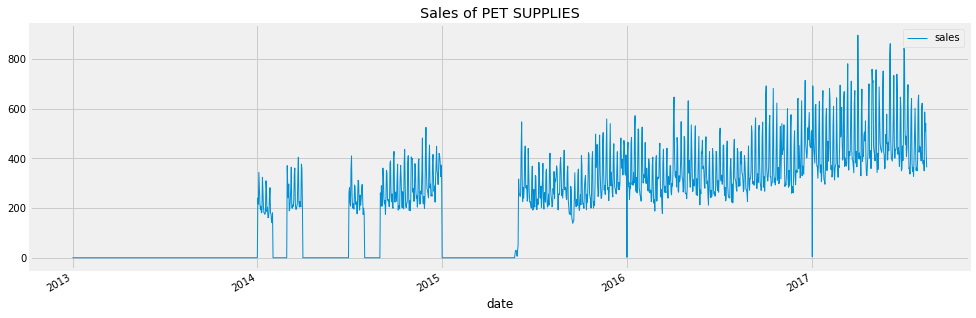

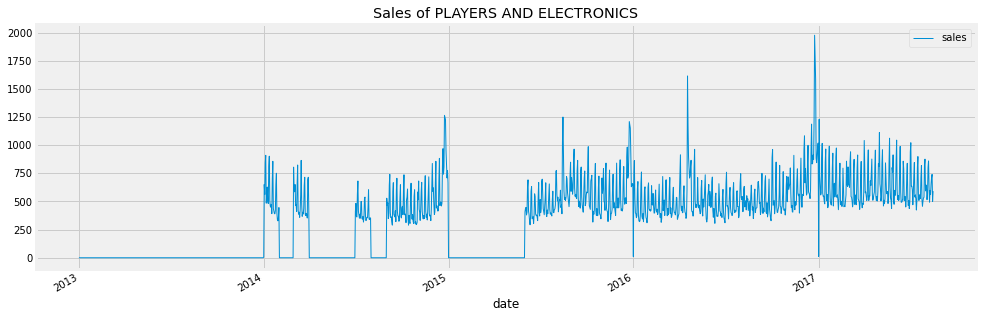

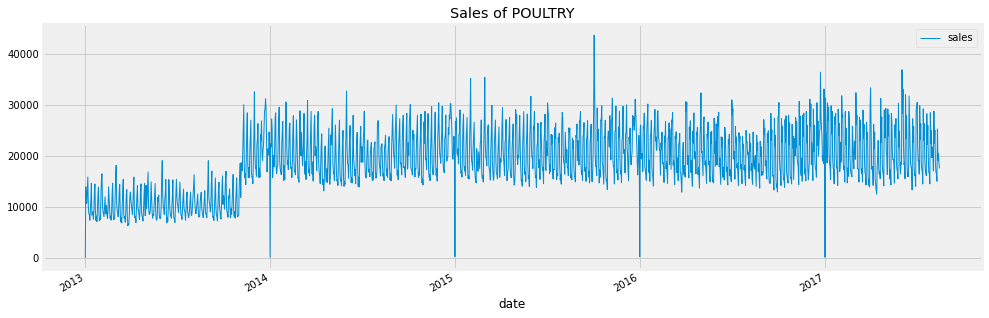

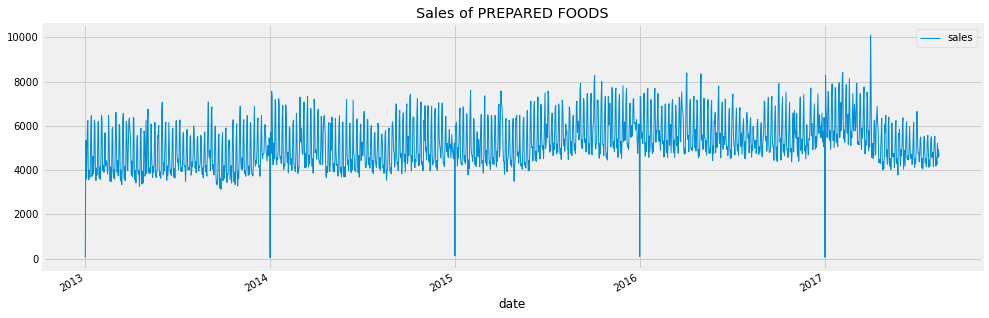

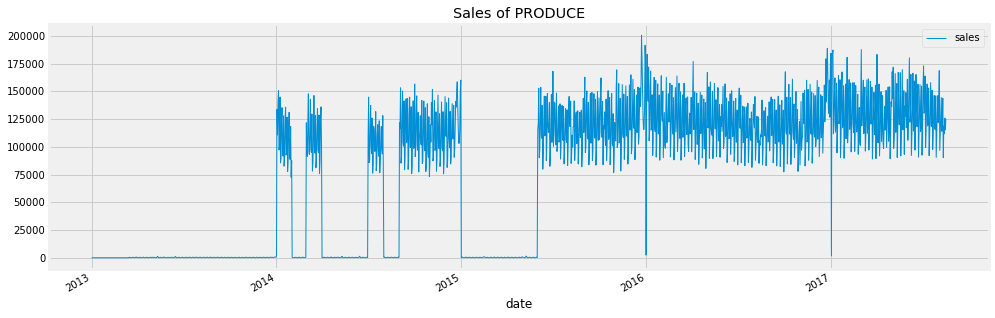

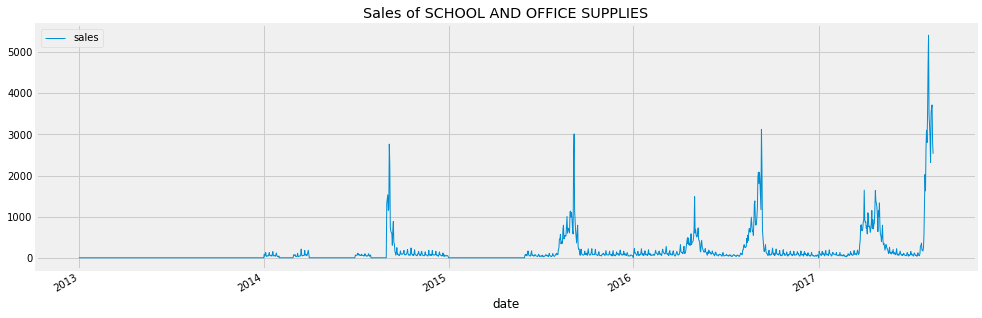

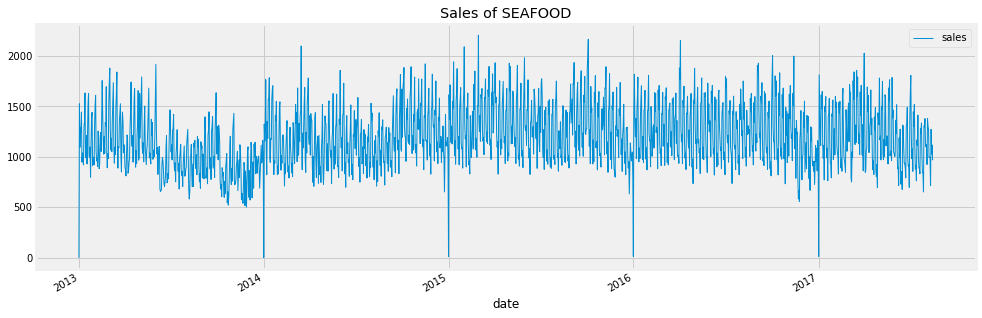

In [44]:
df=df1[['sales','family']].groupby(['family','date']).sum().reset_index(0)
list(df['family'].unique())
for i in list(df['family'].unique()):
    df.loc[df['family']==i] \
        .plot(figsize=(15, 5), title='Sales of '+i,linewidth=1)

    plt.show()

In [51]:
df1.head()

id  store_nbr      family  sales  onpromotion
date                                                     
2013-01-01   0          1  AUTOMOTIVE    0.0            0
2013-01-01   1          1   BABY CARE    0.0            0
2013-01-01   2          1      BEAUTY    0.0            0
2013-01-01   3          1   BEVERAGES    0.0            0
2013-01-01   4          1       BOOKS    0.0            0

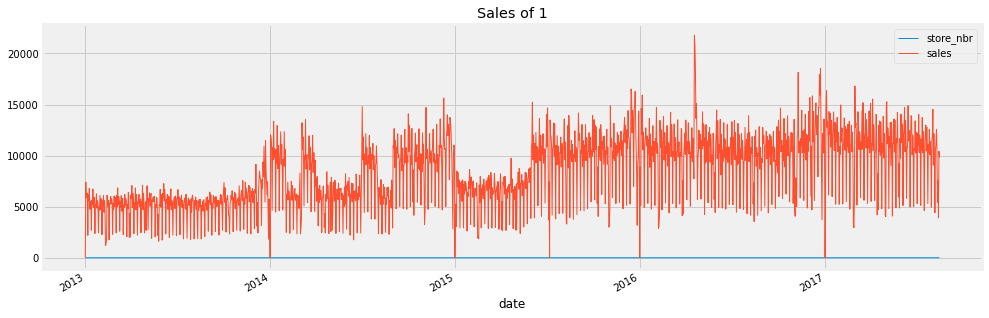

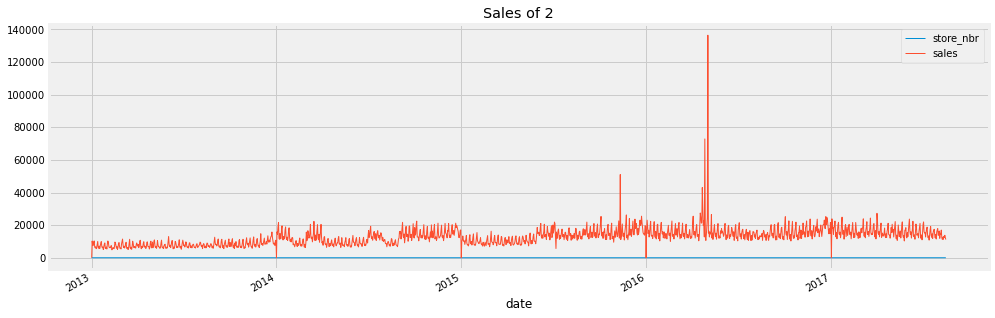

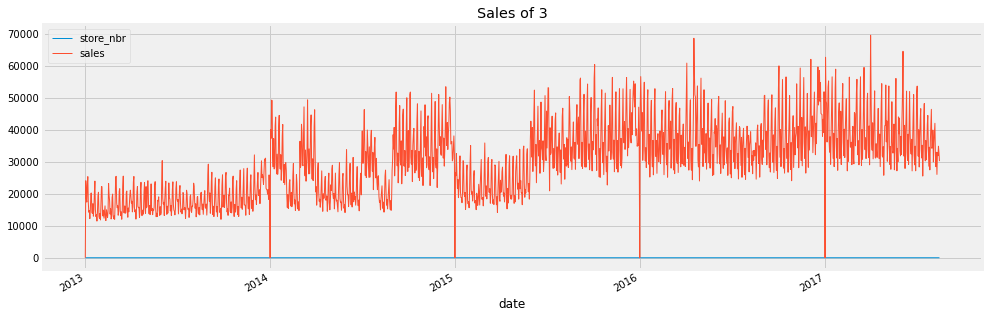

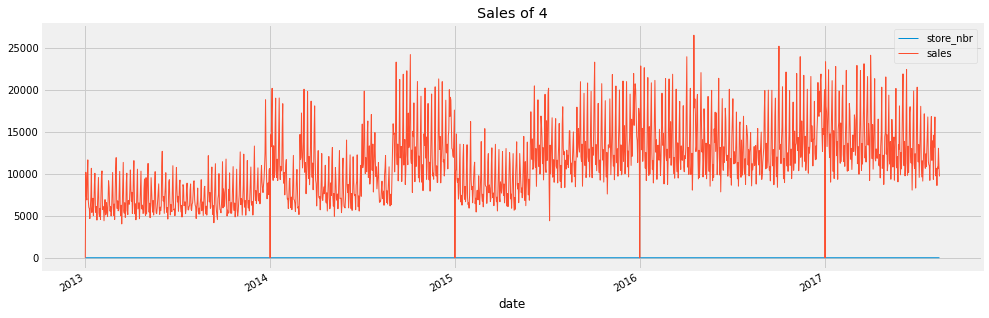

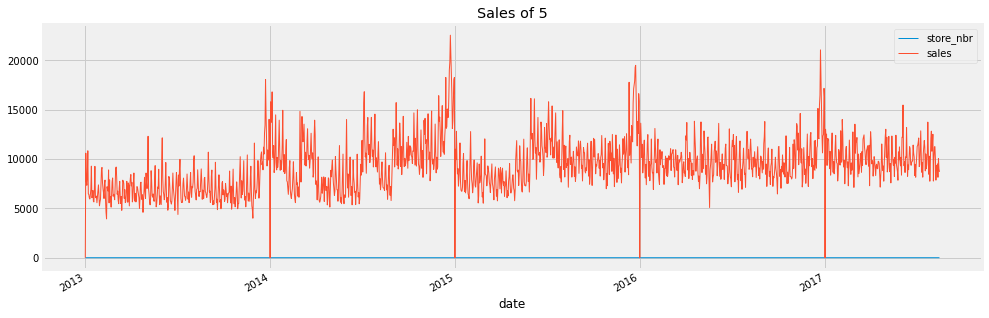

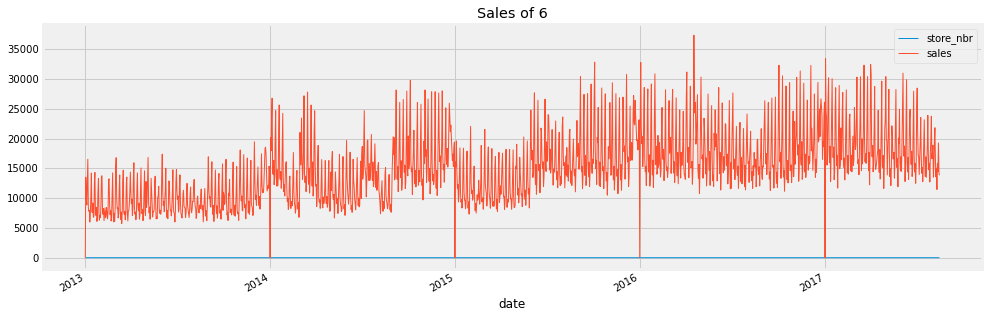

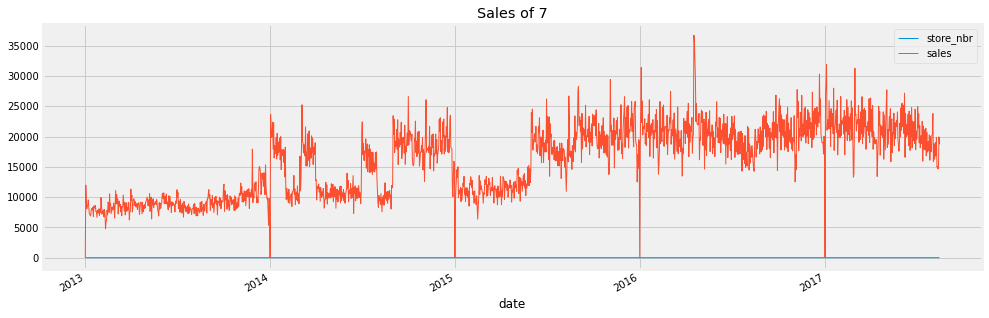

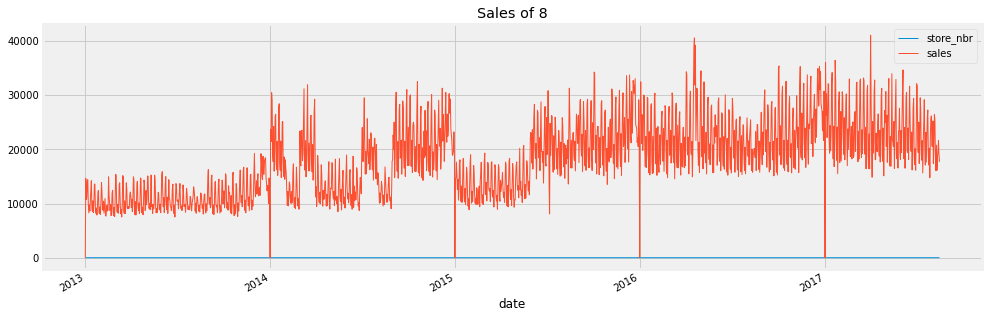

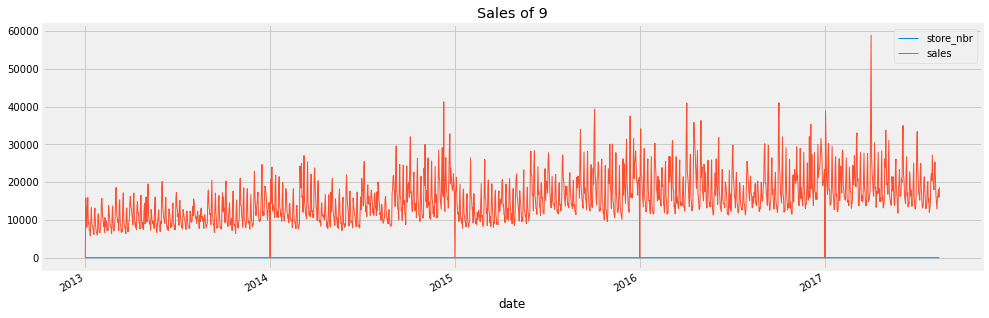

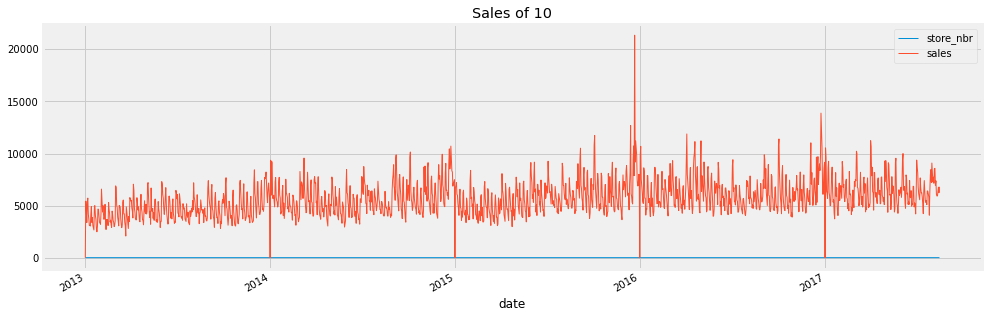

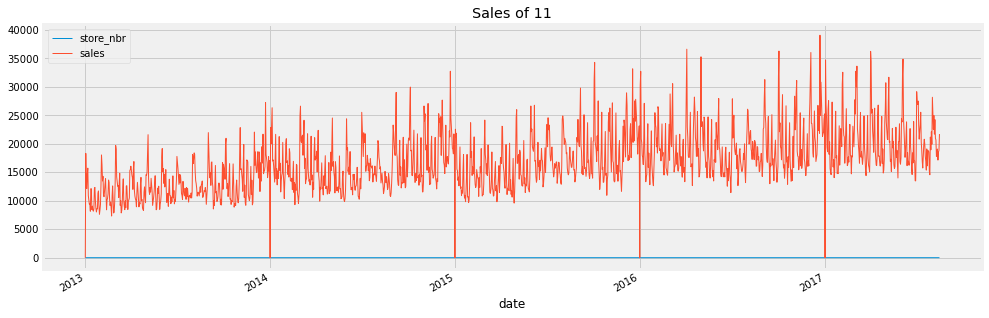

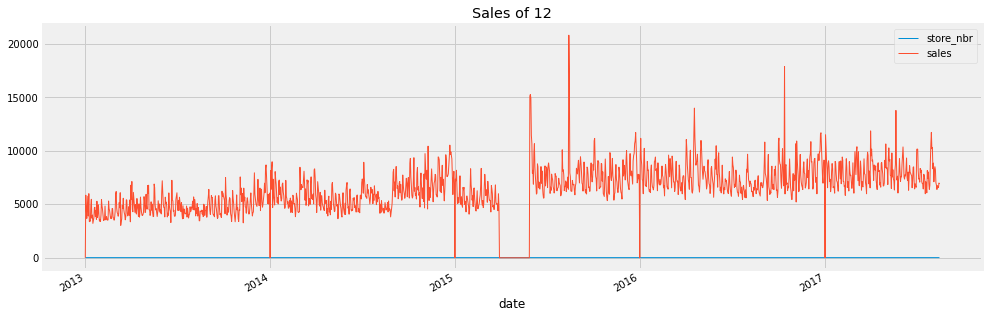

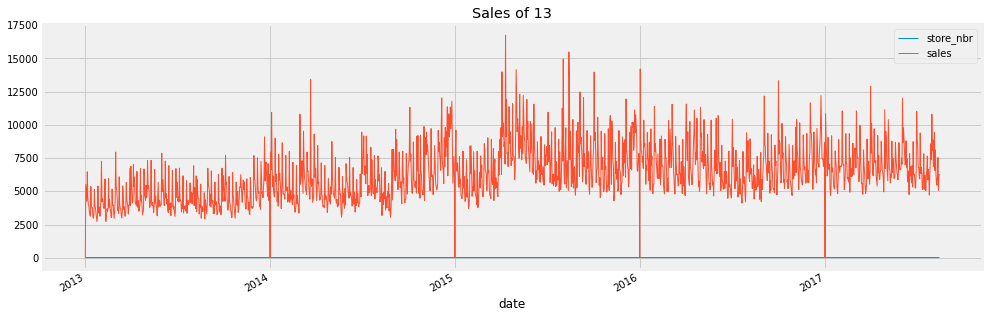

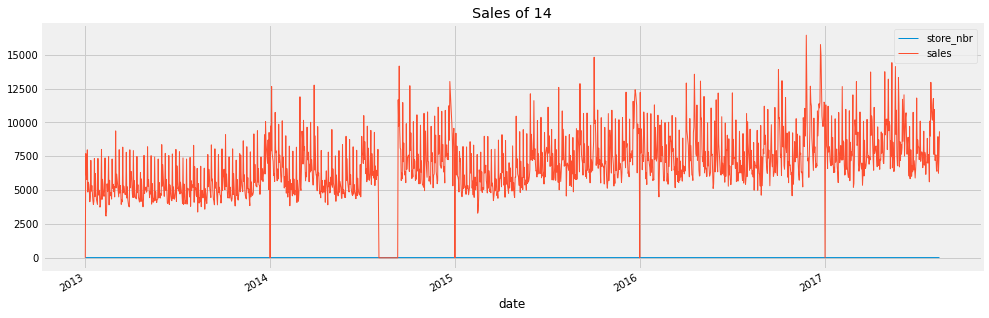

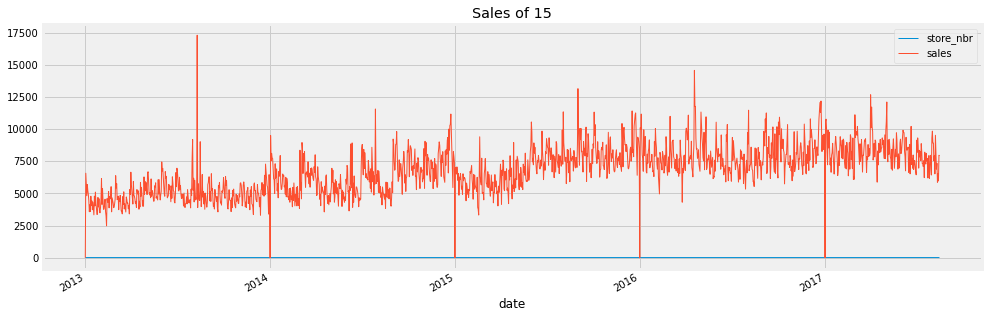

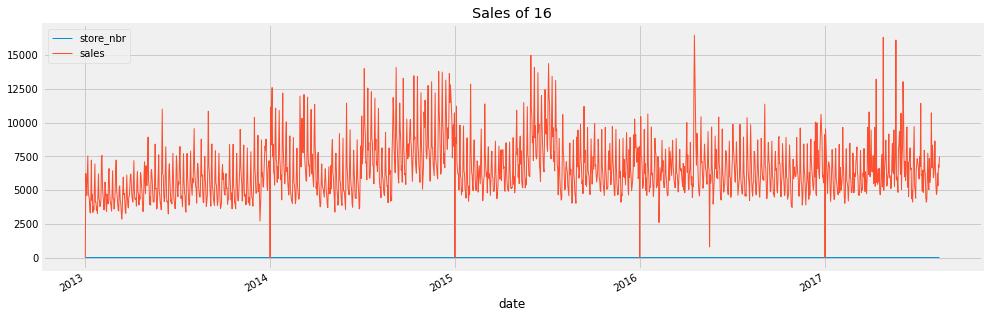

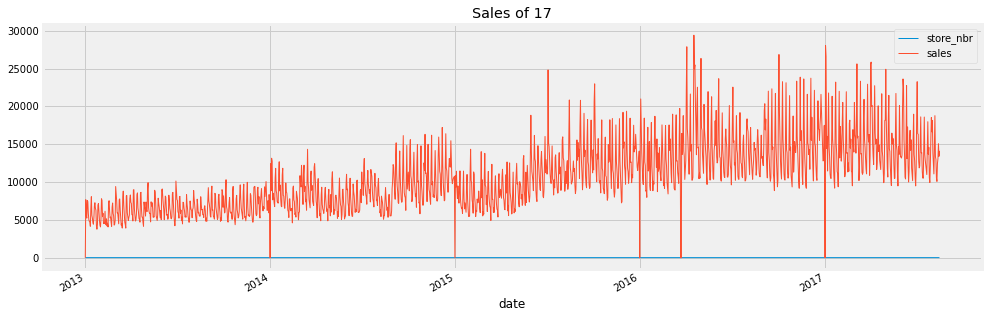

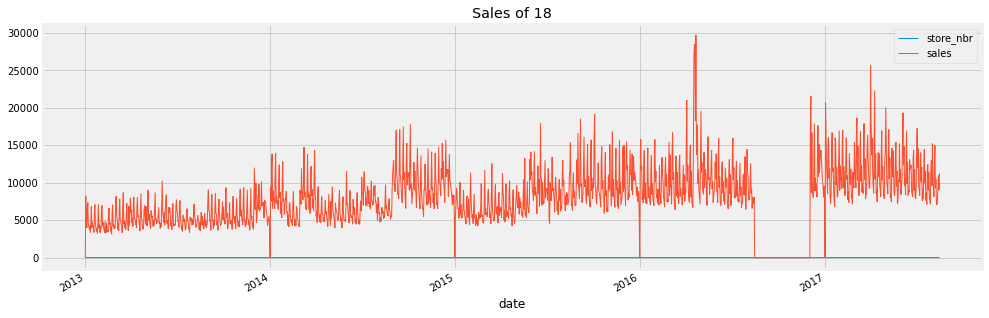

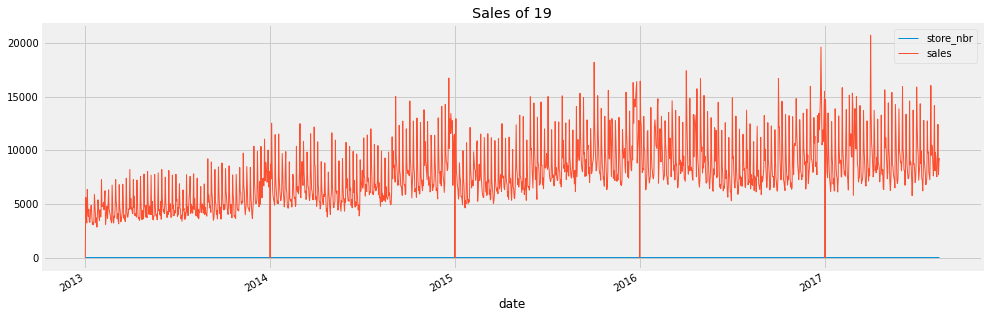

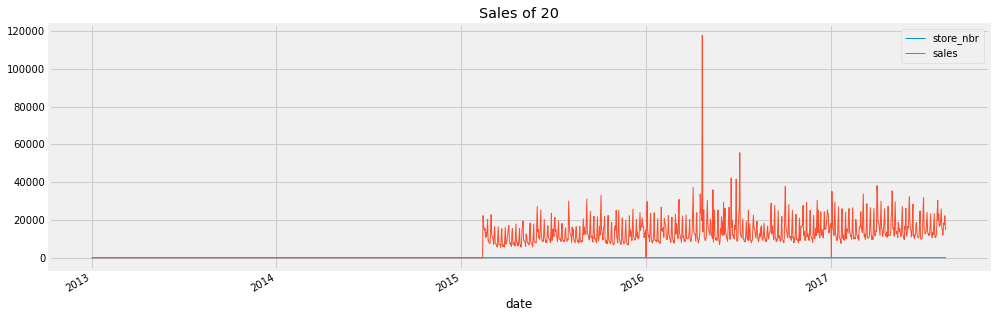

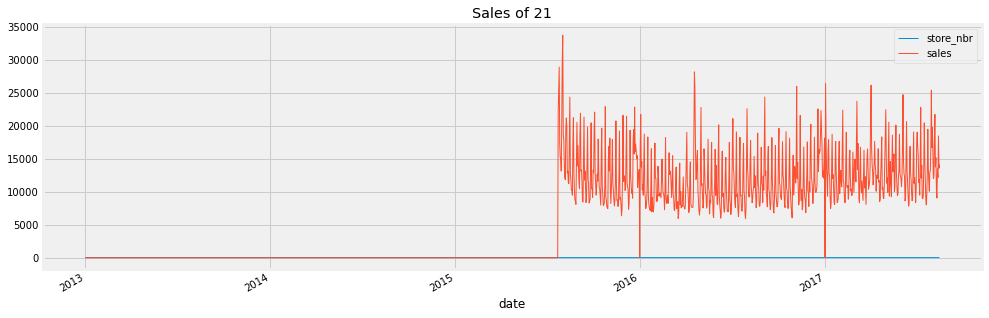

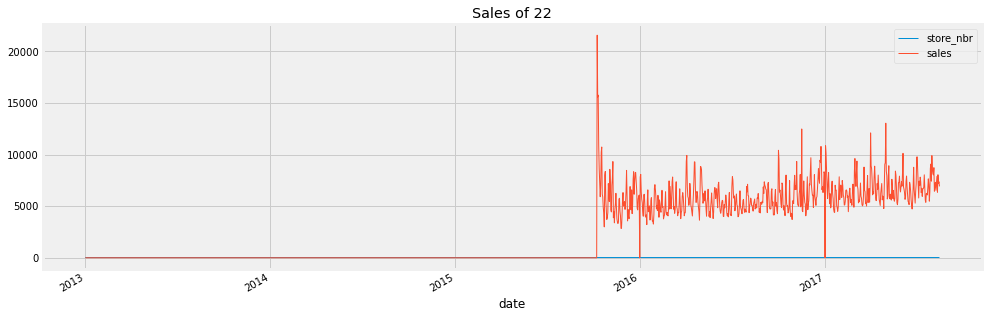

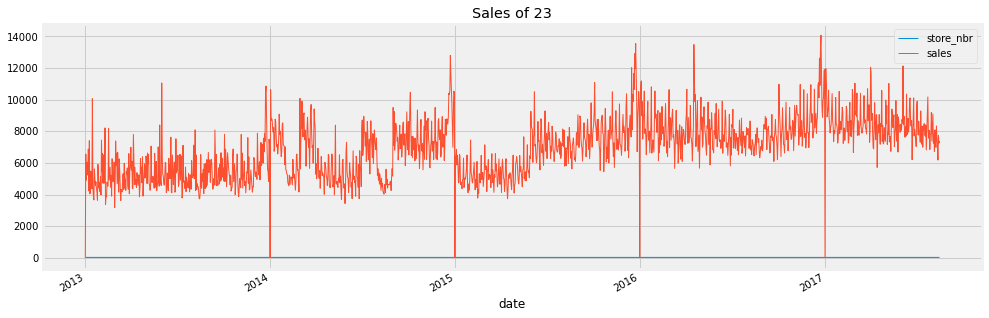

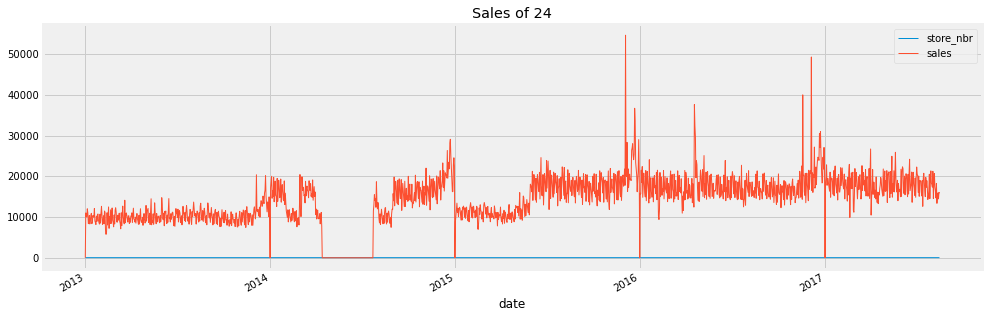

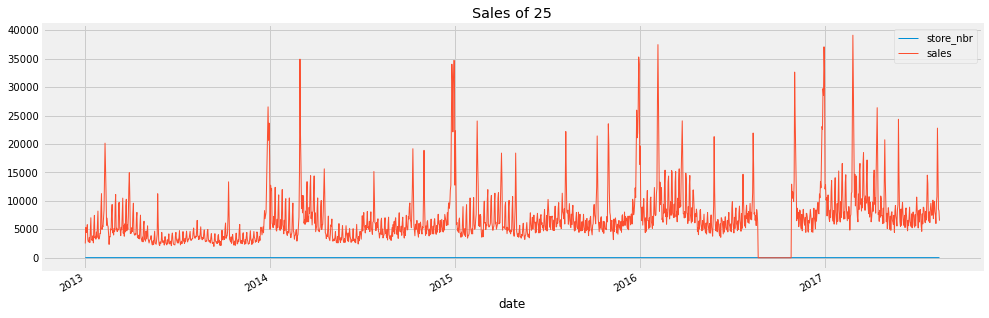

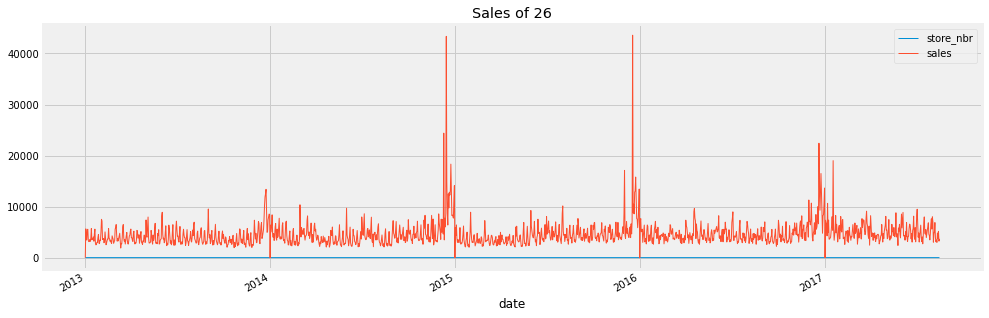

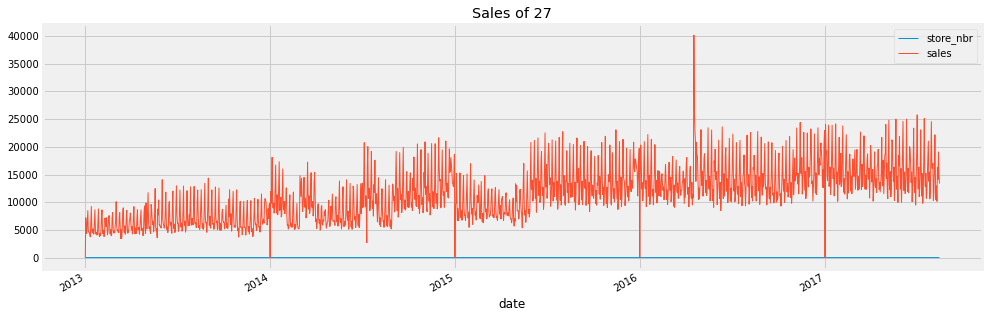

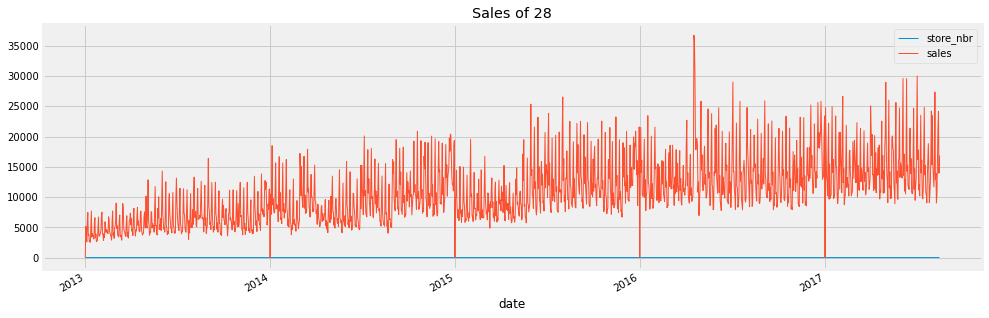

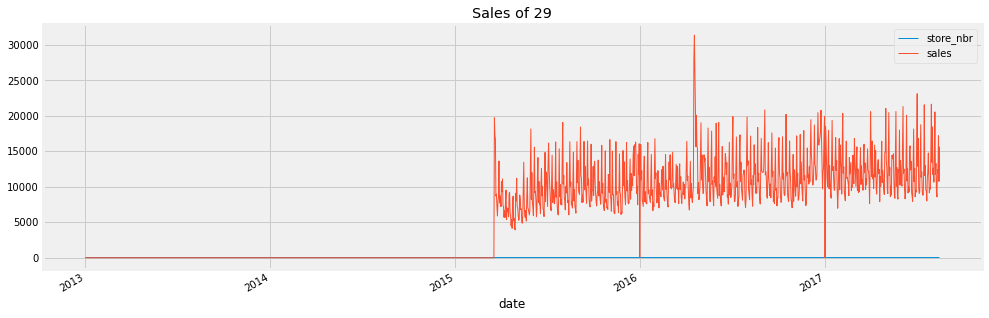

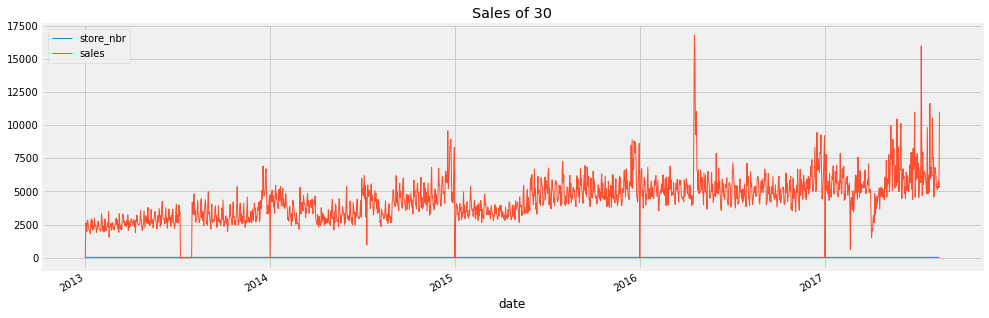

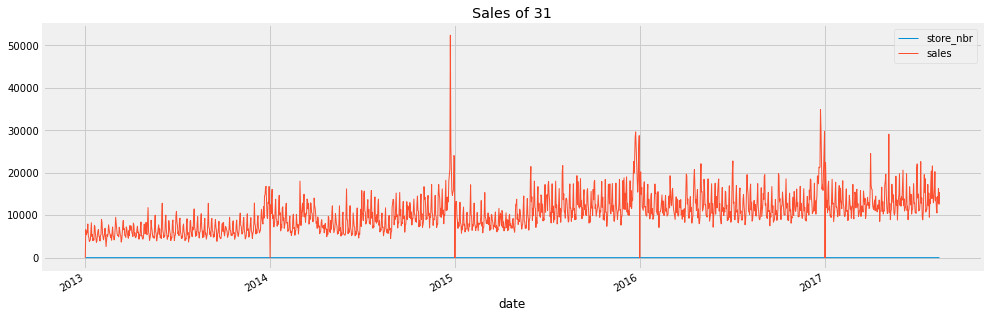

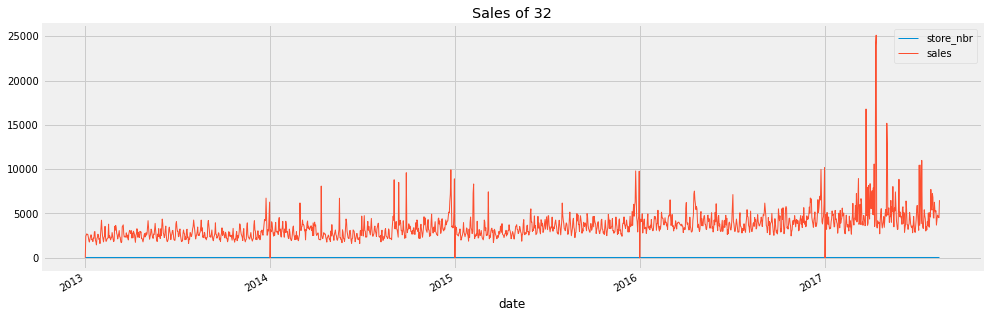

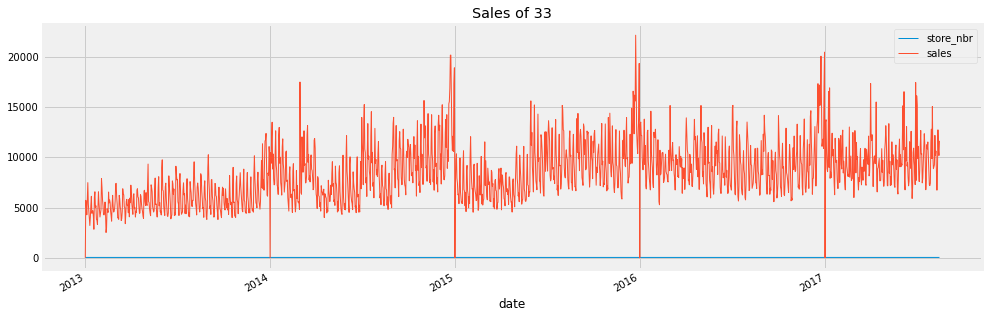

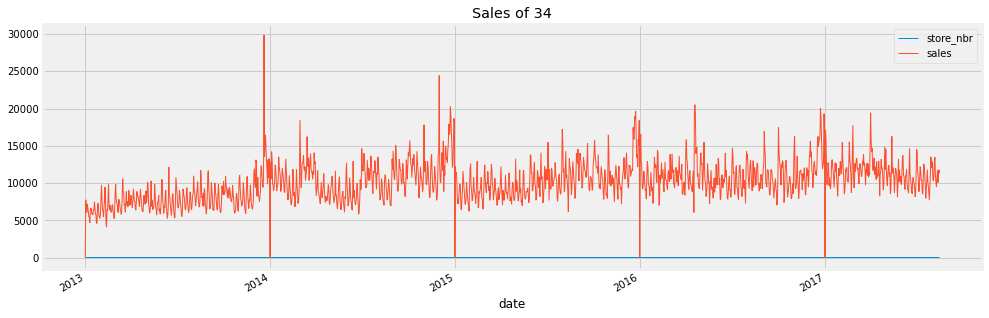

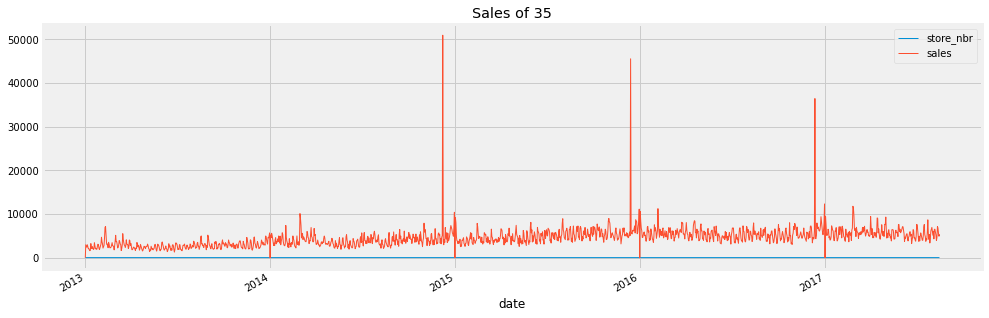

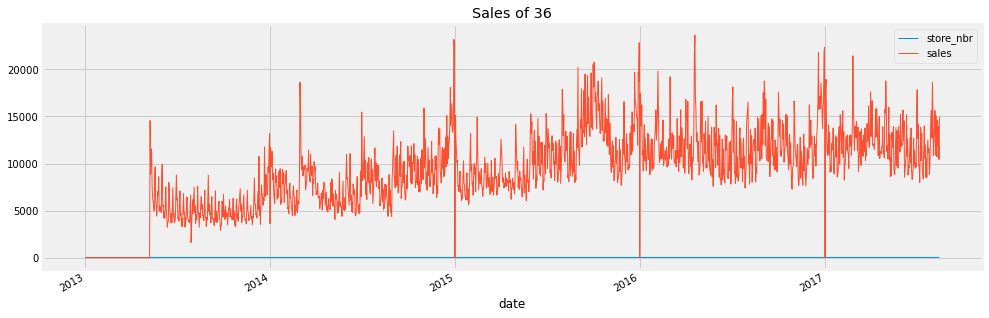

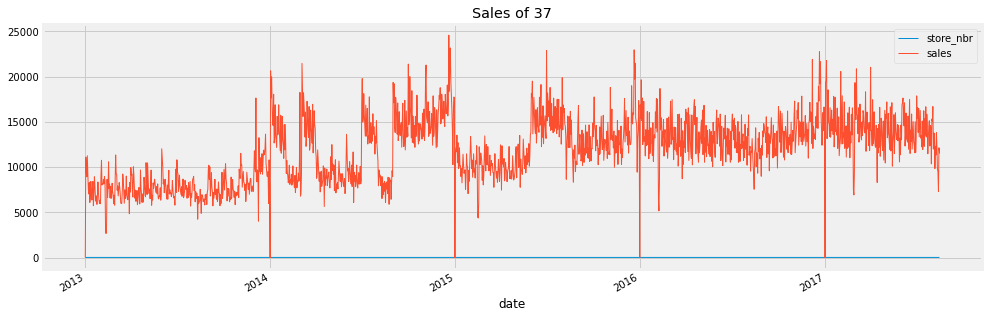

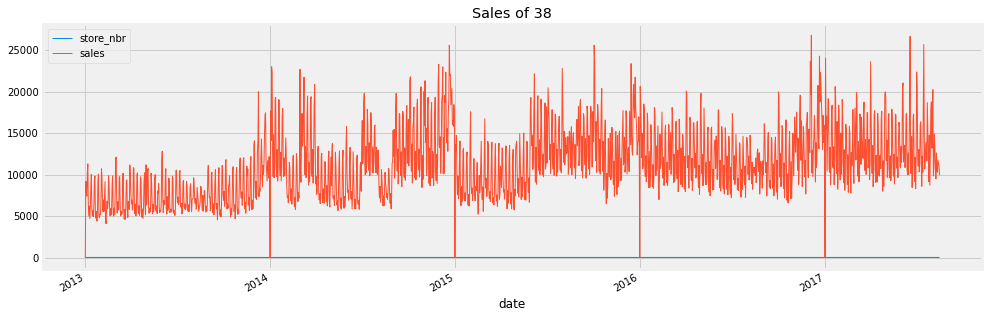

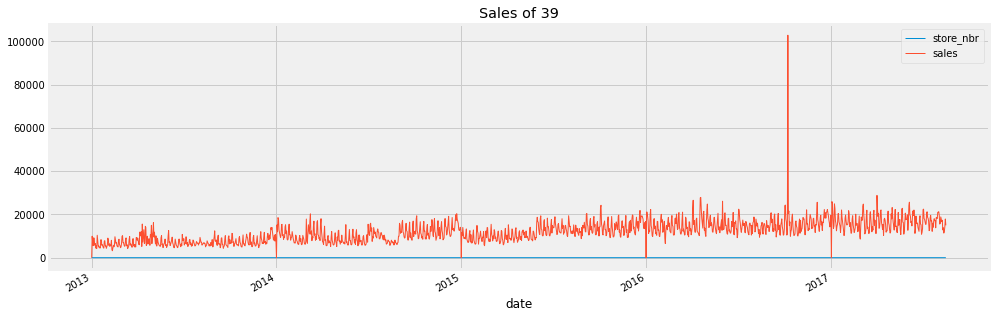

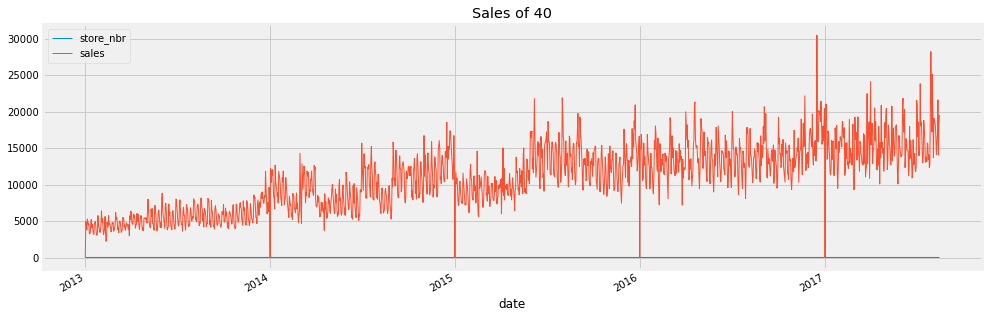

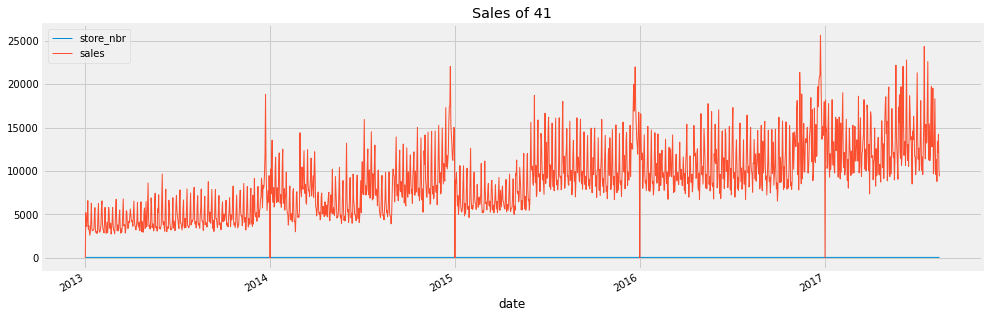

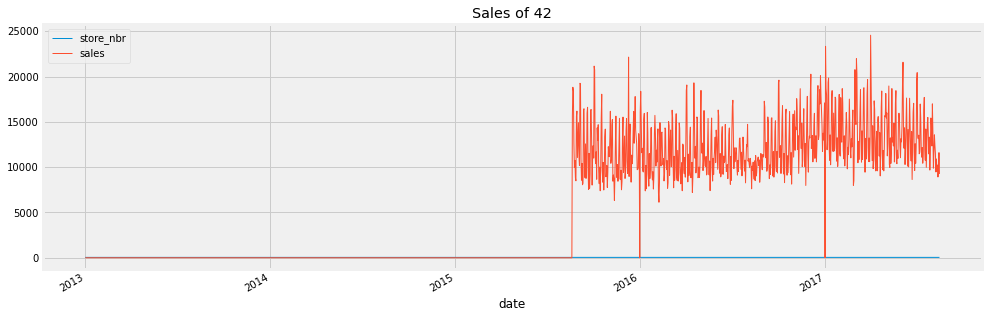

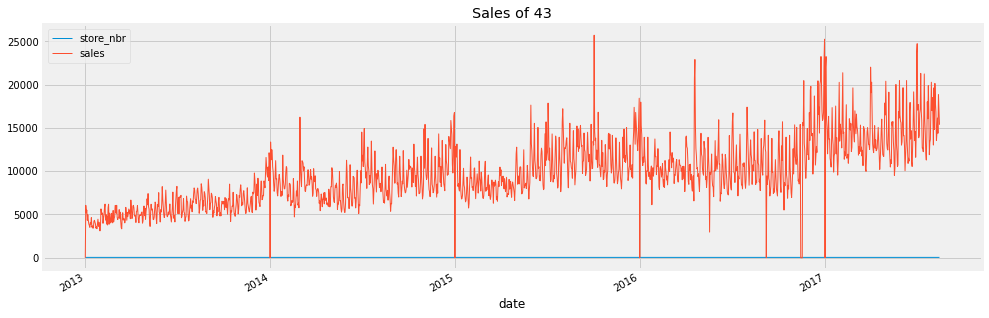

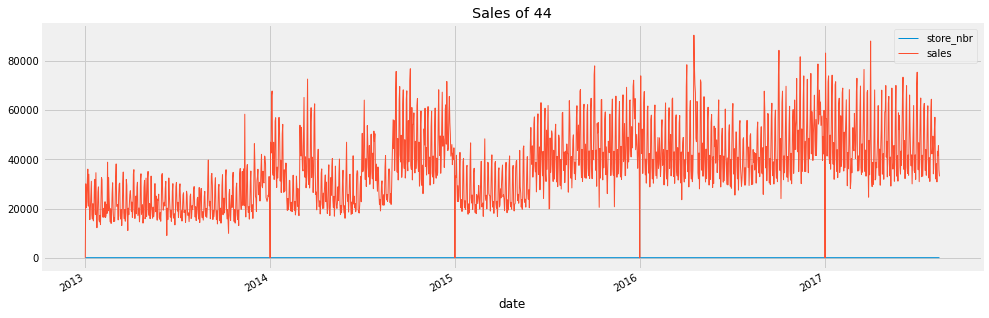

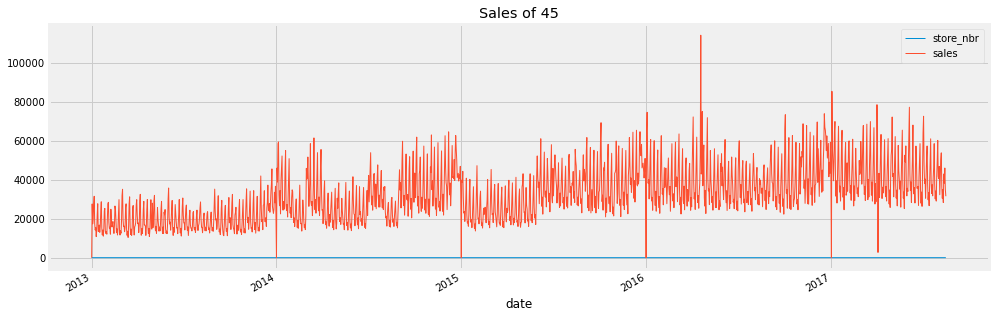

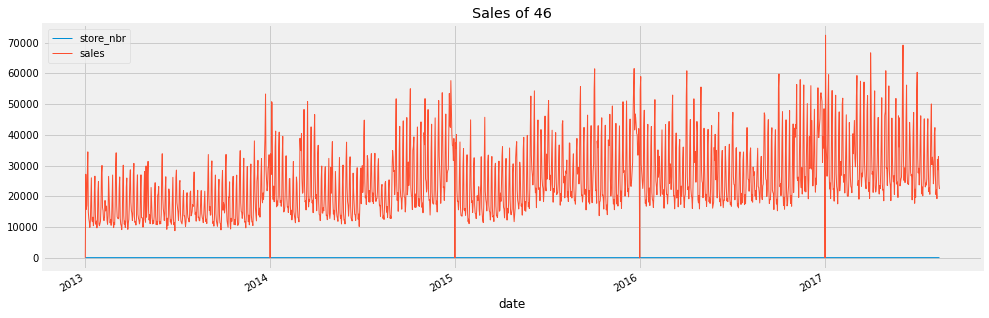

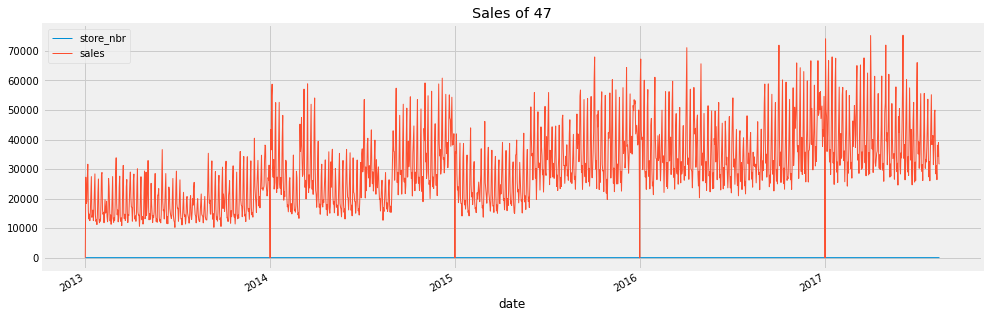

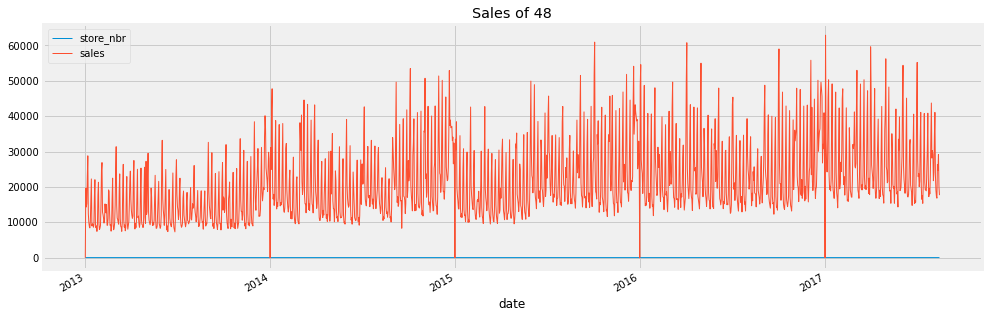

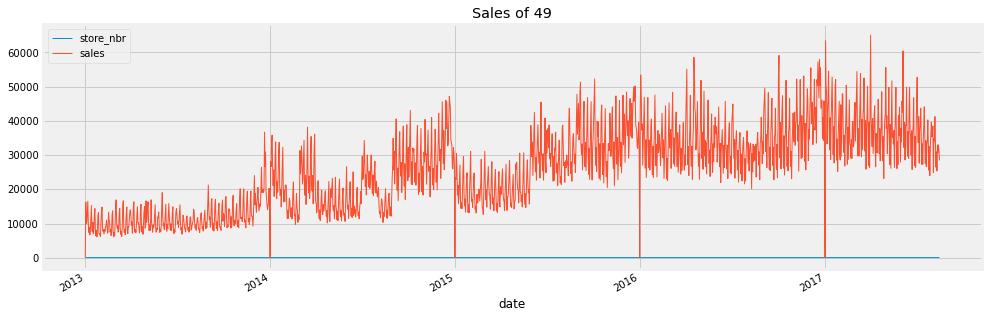

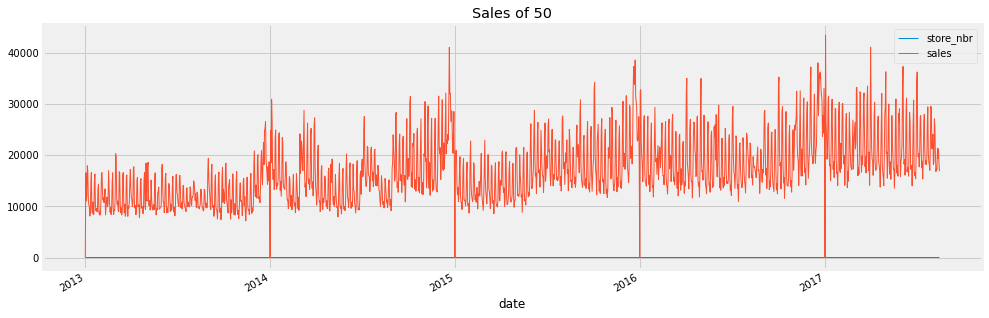

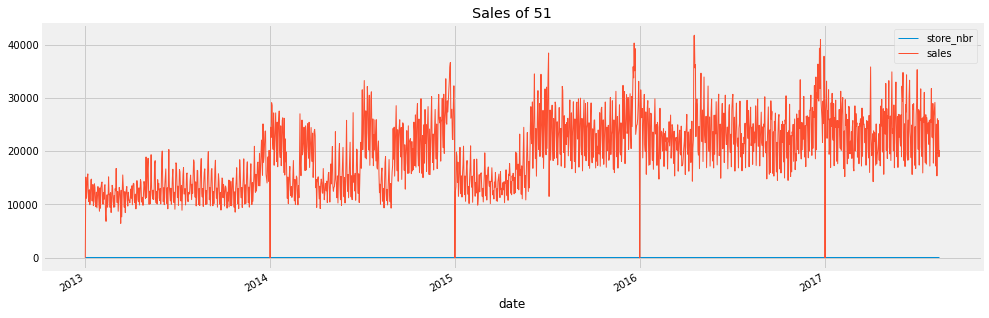

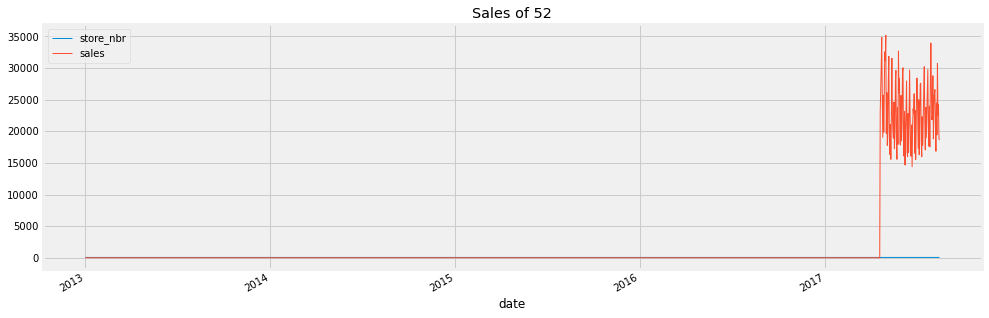

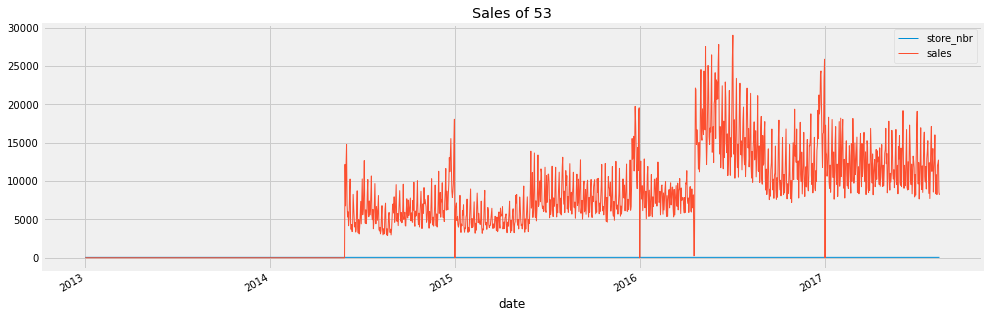

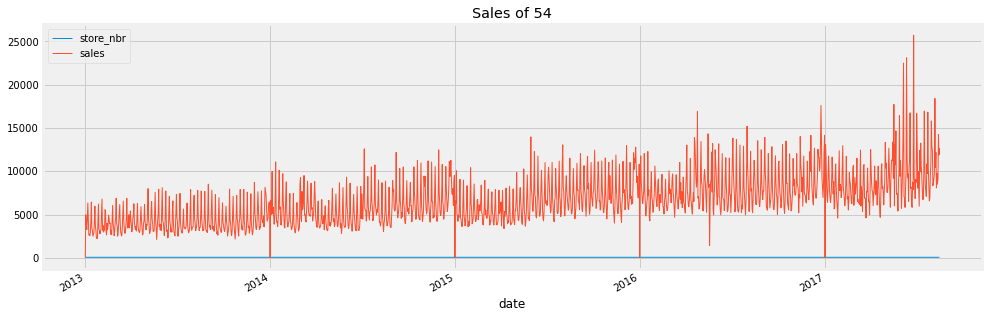

In [53]:
df=df1[['sales','store_nbr']].groupby(['store_nbr','date']).sum().reset_index(0)
list(df['store_nbr'].unique())
for i in list(df['store_nbr'].unique()):
    df.loc[df['store_nbr']==i] \
        .plot(figsize=(15, 5), title='Sales of '+str(i),linewidth=1)
    

    plt.show()

### OIL effect

In [45]:
df2=oil
df2 = df2.set_index('date')
df2.index = pd.to_datetime(df2.index)

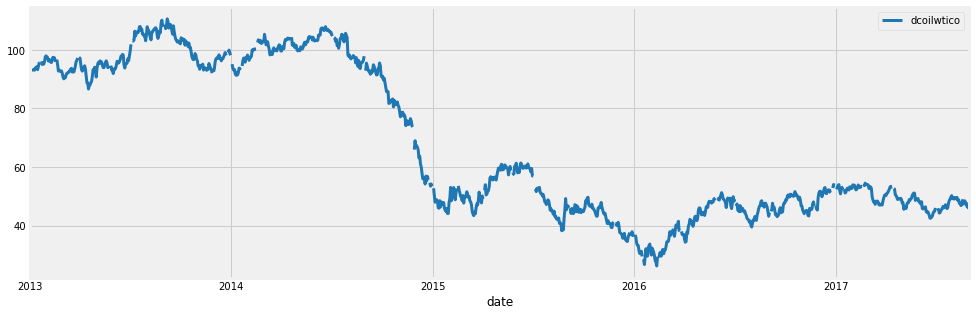

In [49]:
df2.plot(
        figsize=(15, 5),
        color=color_pal[0],
        linewidth=3)
        
plt.show()

### holidays

In [35]:
holidays[holidays['type']=='Holiday']


date     type    locale locale_name                    description  \
0    2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1    2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2    2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3    2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4    2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   
..          ...      ...       ...         ...                            ...   
338  2017-11-12  Holiday     Local      Ambato        Independencia de Ambato   
340  2017-12-06  Holiday     Local       Quito             Fundacion de Quito   
341  2017-12-08  Holiday     Local        Loja              Fundacion de Loja   
344  2017-12-22  Holiday     Local     Salinas       Cantonizacion de Salinas   
348  2017-12-25  Holiday  National     Ecuador                        Navidad   

     transferred  
0          False  
1          False  
2          False  
3          False  
4          False  
..           ...  
338        False  
340         True  
341        False  
344        False  
348        False  

[221 rows x 6 columns]